# IMPORTING LIBRARIES OF PYTHON

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# LOADING DATASET

In [3]:
df=pd.read_csv('spam.csv')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df=df.drop('Unnamed: 2',axis=1)
df=df.drop('Unnamed: 3',axis=1)
df=df.drop('Unnamed: 4',axis=1)

In [6]:
df.shape

(5572, 2)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# DATA VISUALIZATIONS

In [8]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

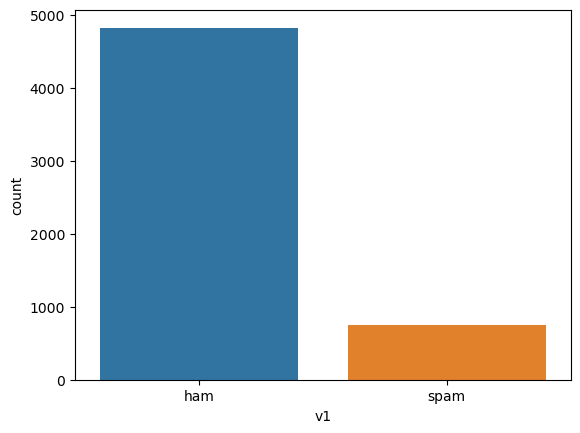

In [9]:
sns.countplot(x='v1',data=df)

# EDA AND DATA CLEANING

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.replace({"v1":{'ham':0,'spam':1}},inplace=True)

In [13]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
x=df.v2.values

In [15]:
y=df.v1.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv=CountVectorizer()
x_train=cv.fit_transform(xtrain)

In [20]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x_test=cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
x_train.shape

(4135, 7658)

In [23]:
x_test.shape

(1034, 7658)

# MODEL BUILDING USING NAIVE BAYES CLASSIFIER

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model=MultinomialNB()

In [26]:
model.fit(x_train,ytrain)

MultinomialNB()

In [27]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(ytest,pred)

0.9854932301740812

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[887,   2],
       [ 13, 132]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

